In [38]:
# Julian L. Avila - 20212107030
# Juan S. Acuna - 20212107034

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

data_1 = './Data/weatherHistory.csv'
data_2 = './Data/Solar_Prediction.csv'

df_1 = pd.read_csv(data_1)
df_2 = pd.read_csv(data_2)

In [40]:
print(df_1)
df_1.describe()

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [41]:
print(df_2)
df_2.describe()

         UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
1      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
2      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
3      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
4      1475227824  9/29/2016 12:00:00 AM  23:30:24       1.21           48   
...           ...                    ...       ...        ...          ...   
32680  1480587604       12-01-2016 00:00  00:20:04       1.22           44   
32681  1480587301       12-01-2016 00:00  00:15:01       1.17           44   
32682  1480587001       12-01-2016 00:00  00:10:01       1.20           44   
32683  1480586702       12-01-2016 00:00  00:05:02       1.23           44   
32684  1480586402       12-01-2016 00:00  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268500e+04,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000
mean,1.478047e+09,207.130997,51.103350,30.422878,75.016797,143.488784,6.243888
std,3.005042e+06,315.919167,6.201228,0.054674,25.990465,83.168561,3.490525
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475547e+09,1.230000,46.000000,30.400000,56.000000,82.220000,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.240000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [42]:
def load_and_format_data(file_path, columns, date_column=None, unix_column=None):
    df = pd.read_csv(file_path)[columns]
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column], utc=True)
    if unix_column:
        df[unix_column] = pd.to_datetime(df[unix_column], unit='s', utc=True)
    return df

def add_date_parts(df, date_column):
    date_parts = ['year', 'month', 'day', 'hour', 'minute']
    date_data = df[date_column].apply(lambda x: pd.Series([x.year, x.month, x.day, x.hour, x.minute]))
    return df.join(date_data.set_axis(date_parts, axis=1))

def rename_and_reorder(df, rename_map, new_order):
    return df.rename(columns=rename_map).reindex(columns=new_order)

data_1 = './Data/weatherHistory.csv'
data_2 = './Data/Solar_Prediction.csv'

columns_1 = ['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']
columns_2 = ['UNIXTime', 'Temperature', 'Humidity', 'WindDirection(Degrees)', 'Speed']

df_1 = load_and_format_data(data_1, columns_1, date_column='Formatted Date')
df_2 = load_and_format_data(data_2, columns_2, unix_column='UNIXTime')

df_1 = add_date_parts(df_1, 'Formatted Date')
df_2 = add_date_parts(df_2, 'UNIXTime')

rename_map_1 = {
    'Temperature (C)': 'temperature',
    'Humidity': 'humidity',
    'Wind Speed (km/h)': 'speed',
    'Wind Bearing (degrees)': 'direction'
}
rename_map_2 = {
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'WindDirection(Degrees)': 'direction',
    'Speed': 'speed'
}
new_columns = ['year', 'month', 'day', 'hour', 'minute', 'temperature', 'humidity', 'speed', 'direction']

df_1 = rename_and_reorder(df_1, rename_map_1, new_columns)
df_2 = rename_and_reorder(df_2, rename_map_2, new_columns)

df_1, df_2

(       year  month  day  hour  minute  temperature  humidity    speed  \
 0      2006      3   31    22       0     9.472222      0.89  14.1197   
 1      2006      3   31    23       0     9.355556      0.86  14.2646   
 2      2006      4    1     0       0     9.377778      0.89   3.9284   
 3      2006      4    1     1       0     8.288889      0.83  14.1036   
 4      2006      4    1     2       0     8.755556      0.83  11.0446   
 ...     ...    ...  ...   ...     ...          ...       ...      ...   
 96448  2016      9    9    17       0    26.016667      0.43  10.9963   
 96449  2016      9    9    18       0    24.583333      0.48  10.0947   
 96450  2016      9    9    19       0    22.038889      0.56   8.9838   
 96451  2016      9    9    20       0    21.522222      0.60  10.5294   
 96452  2016      9    9    21       0    20.438889      0.61   5.8765   
 
        direction  
 0          251.0  
 1          259.0  
 2          204.0  
 3          269.0  
 4        

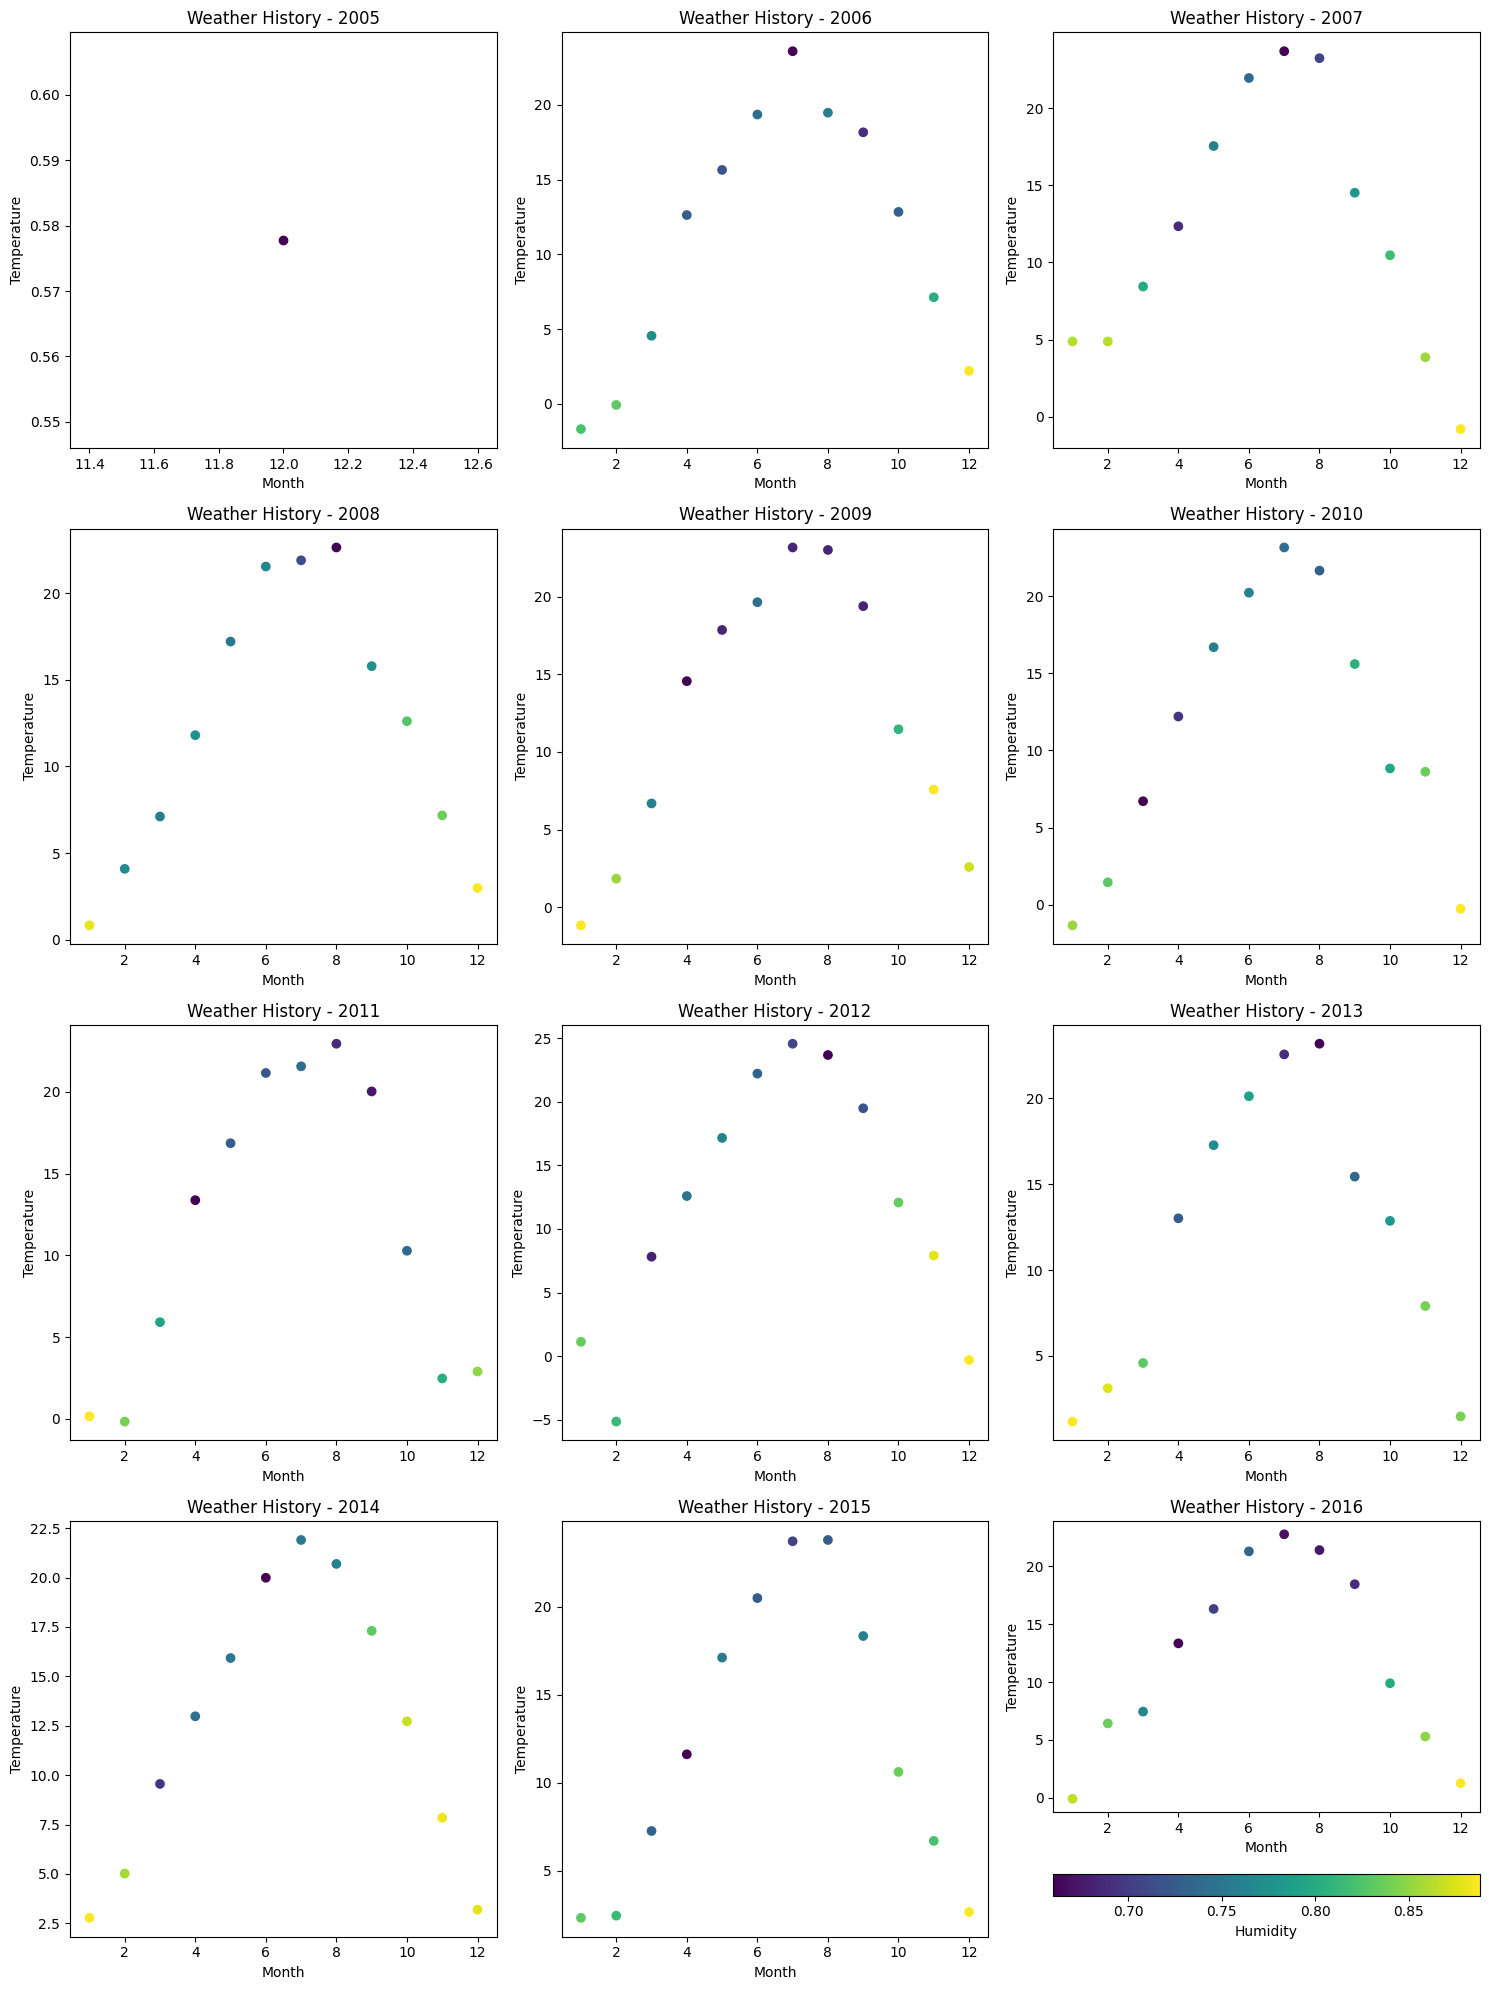

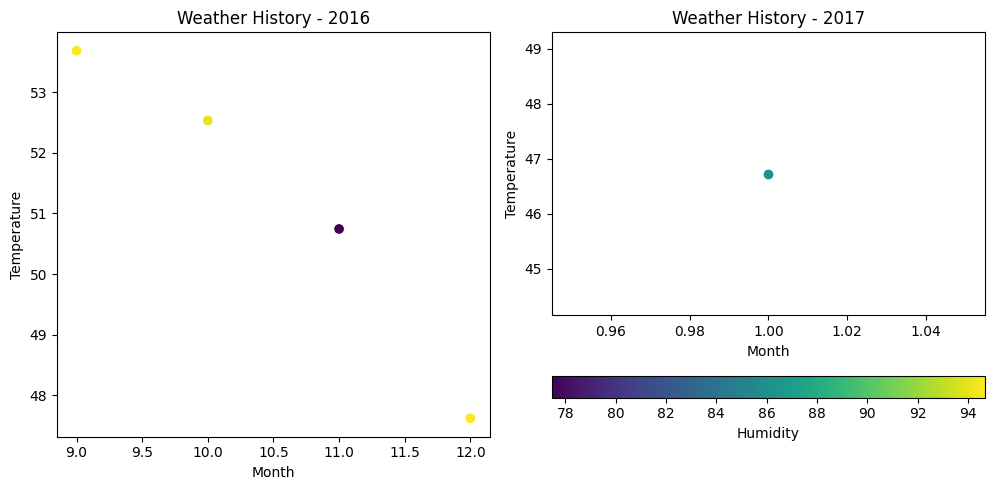

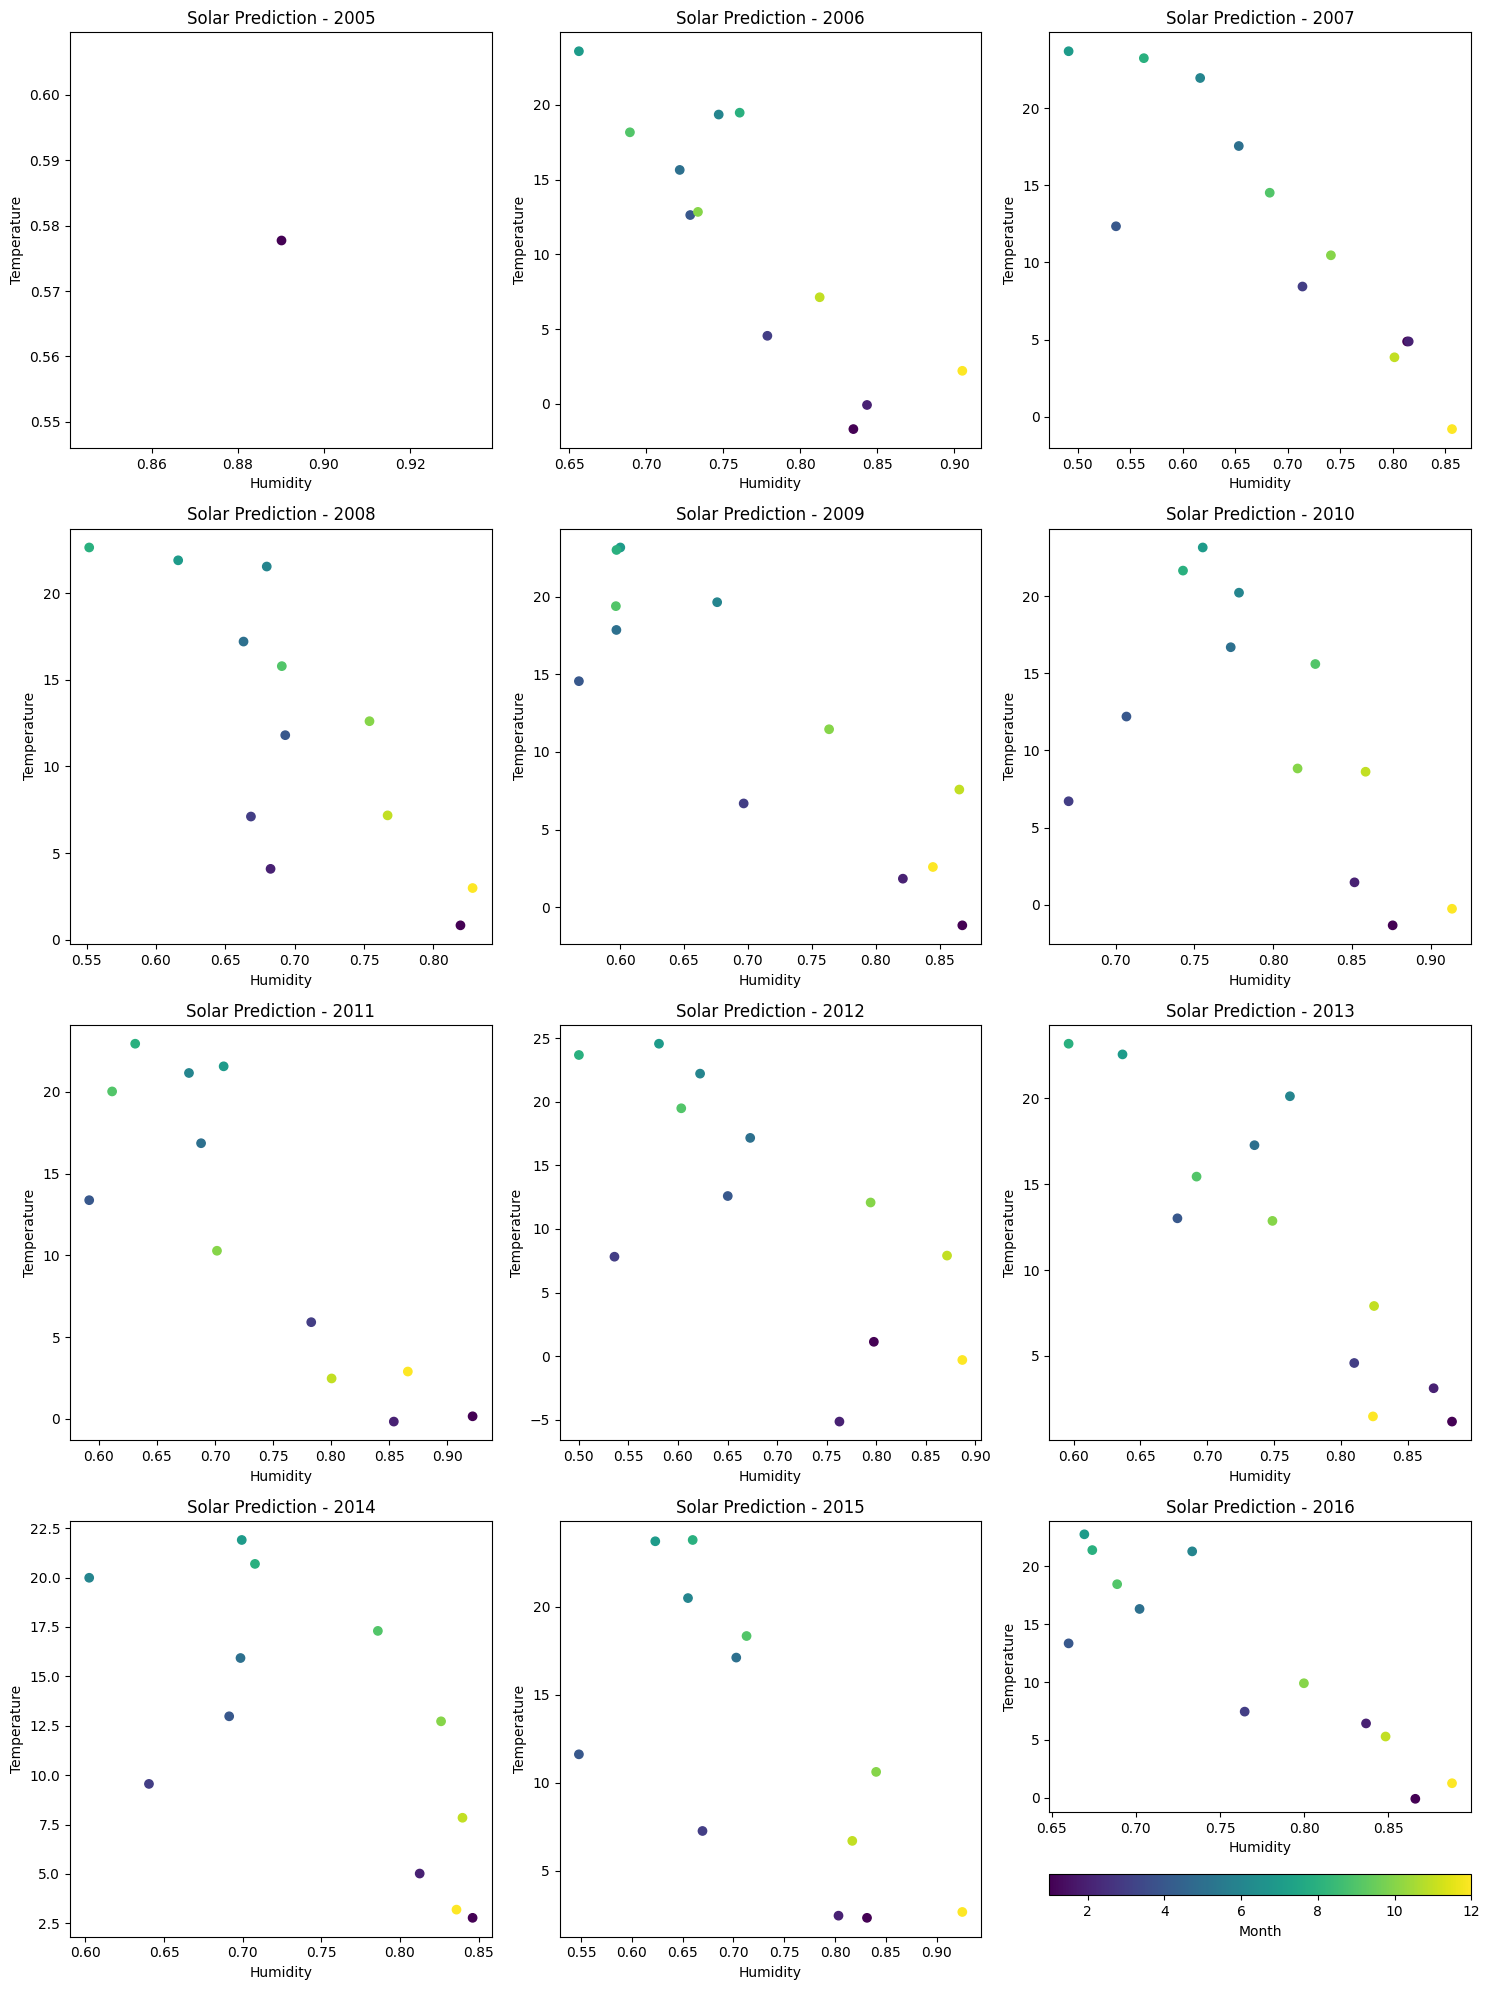

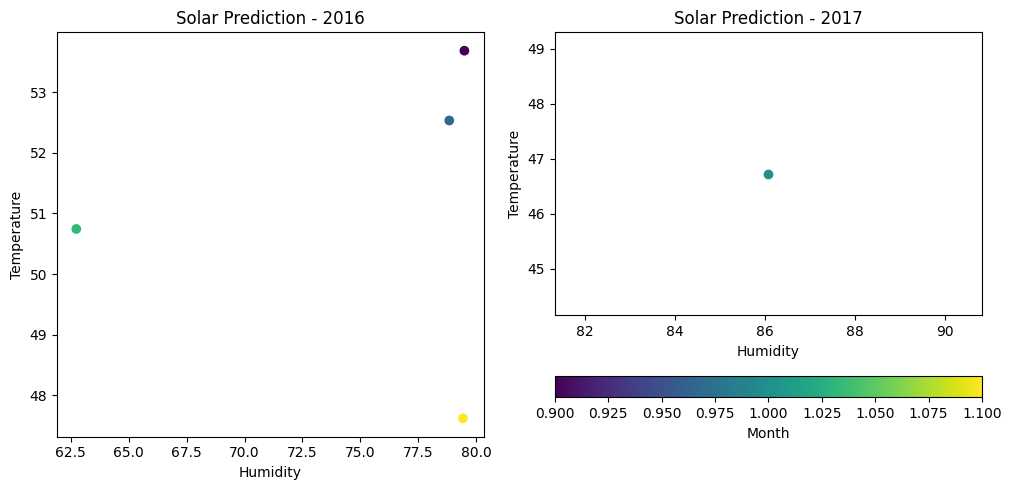

In [43]:
def calculate_monthly_averages(df):
    return (
        df[['temperature', 'humidity', 'speed', 'direction']]
        .groupby(pd.Grouper(freq='ME'))
        .mean()
        .assign(
            year=lambda x: x.index.year,
            month=lambda x: x.index.month
        )
    )

def prepare_data(df, date_cols):
    df['datetime'] = pd.to_datetime(df[date_cols])
    df.set_index('datetime', inplace=True)
    return calculate_monthly_averages(df)

df_1 = prepare_data(df_1, ['year', 'month', 'day', 'hour', 'minute'])
df_2 = prepare_data(df_2, ['year', 'month', 'day', 'hour', 'minute'])

def plot_collage(df, title, feature_x, feature_y, color_feature, num_cols=3):
    unique_years = df['year'].unique()
    num_rows = (len(unique_years) + num_cols - 1) // num_cols
    fig = plt.figure(figsize=(15, 5 * num_rows))
    grid = GridSpec(num_rows, num_cols, figure=fig)

    for idx, year in enumerate(unique_years):
        ax = fig.add_subplot(grid[idx // num_cols, idx % num_cols])
        yearly_data = df[df['year'] == year]
        scatter = ax.scatter(yearly_data[feature_x], yearly_data[feature_y],
                             c=yearly_data[color_feature], cmap='viridis')
        ax.set_title(f'{title} - {year}')
        ax.set_xlabel(feature_x.capitalize())
        ax.set_ylabel(feature_y.capitalize())

    fig.colorbar(scatter, ax=ax, label=color_feature.capitalize(), orientation='horizontal')
    plt.tight_layout()
    plt.show()

plot_collage(df_1, 'Weather History', 'month', 'temperature', 'humidity')
plot_collage(df_2, 'Weather History', 'month', 'temperature', 'humidity')
plot_collage(df_1, 'Solar Prediction', 'humidity', 'temperature', 'month')
plot_collage(df_2, 'Solar Prediction', 'humidity', 'temperature', 'month')

temperature vs humidity
Mean Squared Error: 29.966453216061456
R² Score: 0.3932149108106189


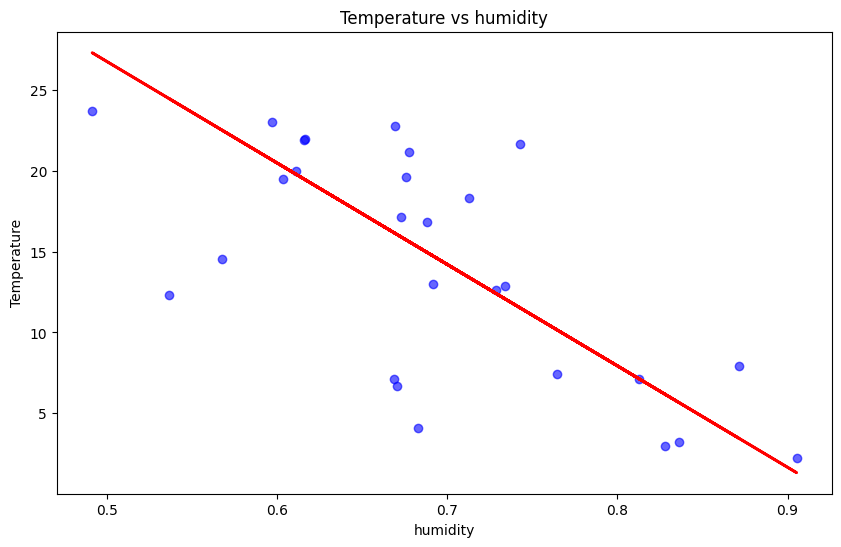

temperature vs speed
Mean Squared Error: 43.13934012101937
R² Score: 0.1264795952270461


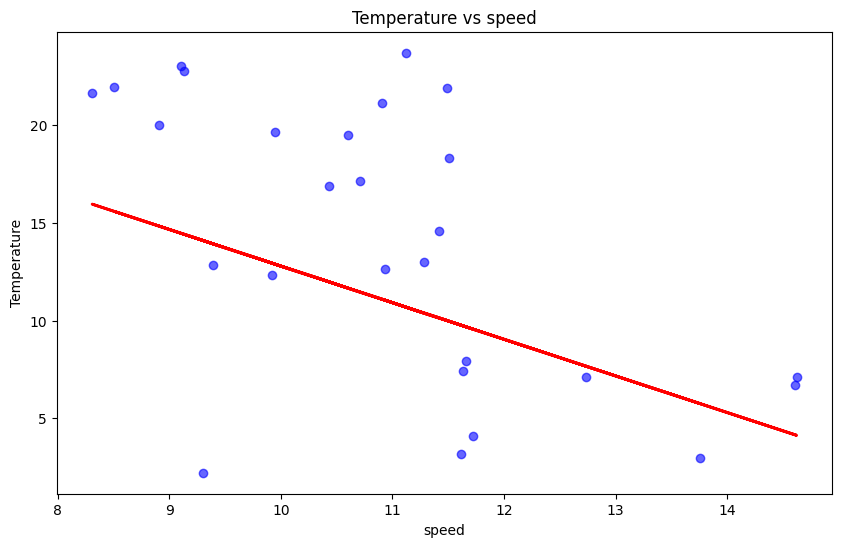

temperature vs direction
Mean Squared Error: 49.47367594683714
R² Score: -0.001783182530190608


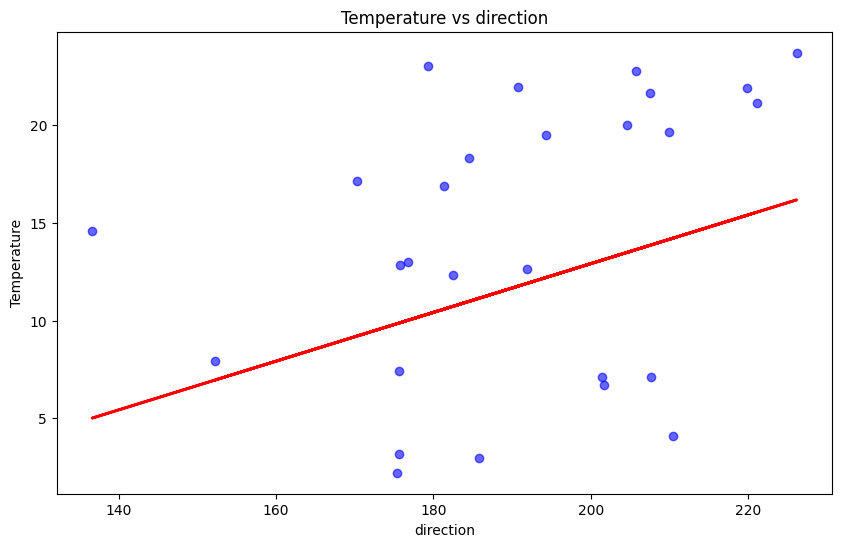

temperature vs month
Mean Squared Error: 61.096518963694145
R² Score: -0.2371319502261191


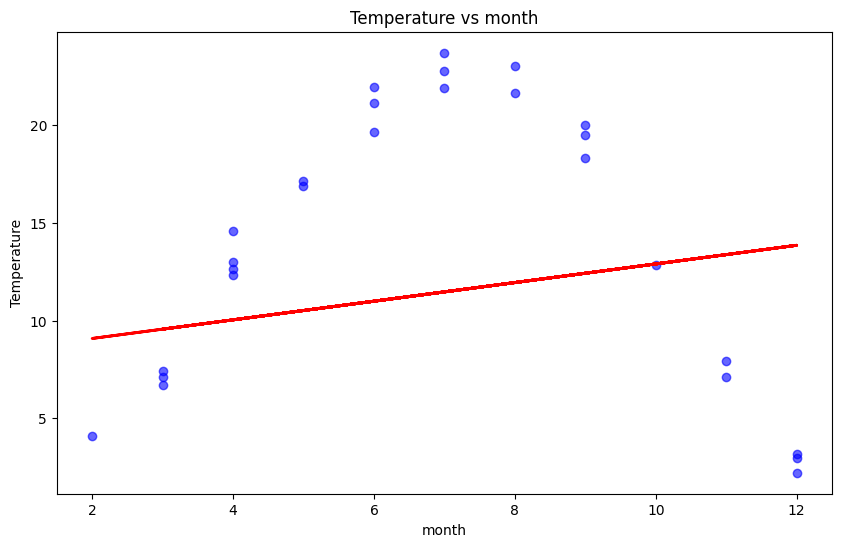

temperature vs ['humidity', 'speed', 'direction', 'month']
Mean Squared Error: 16.058581011345606
R² Score: 0.6748328058389778


In [44]:
def run_linear_regression(df, target, feature):
    X = df[[feature]].values
    y = df[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{target} vs {feature}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R² Score: {r2_score(y_test, y_pred)}')

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, alpha=0.6, color='b')
    plt.plot(X_test, y_pred, color='r', lw=2)
    plt.xlabel(f'{feature}')
    plt.ylabel('Temperature')
    plt.title(f'Temperature vs {feature}')
    plt.show()

    return model

def run_multilinear_regression(df, target, features):
    X = df[features].values
    y = df[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{target} vs {features}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R² Score: {r2_score(y_test, y_pred)}')

    return model

features = ['humidity', 'speed', 'direction', 'month']

for i in features:
    linear_model = run_linear_regression(df_1, target='temperature', feature=i)

multilinear_model = run_multilinear_regression(df_1, target='temperature', features=features)

temperature vs humidity
MSE: 29.966453216061456, R²: 0.3932149108106189


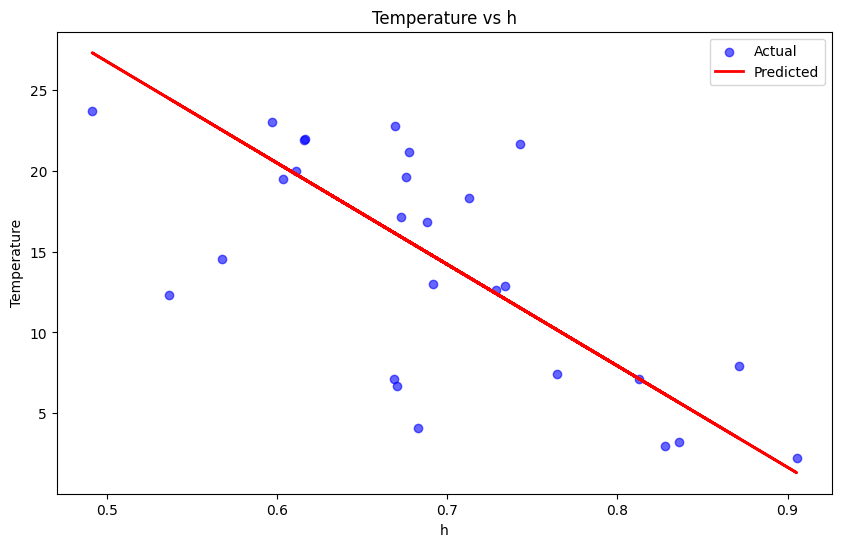

temperature vs speed
MSE: 43.13934012101937, R²: 0.1264795952270461


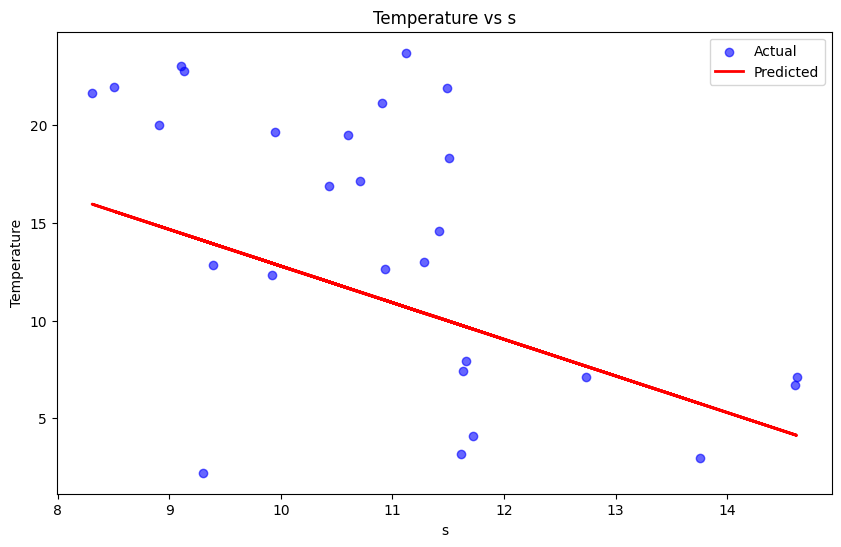

temperature vs direction
MSE: 49.47367594683714, R²: -0.001783182530190608


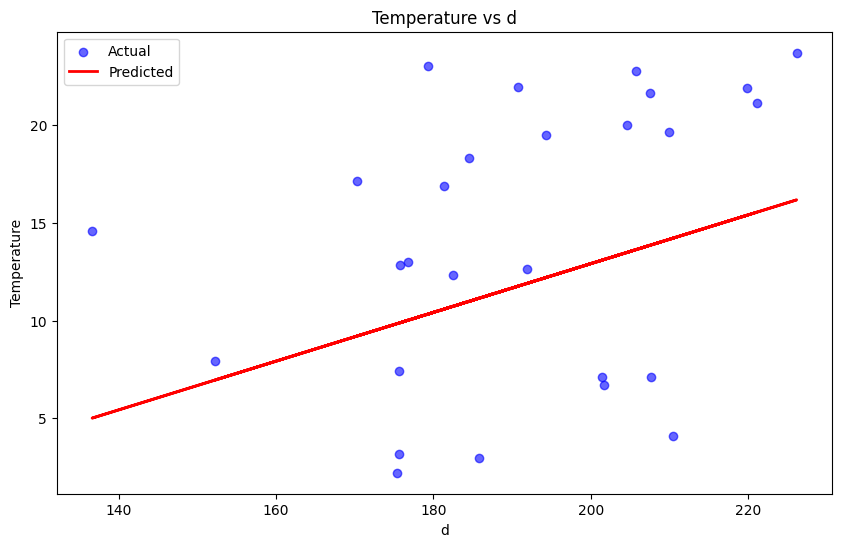

temperature vs month
MSE: 61.096518963694145, R²: -0.2371319502261191


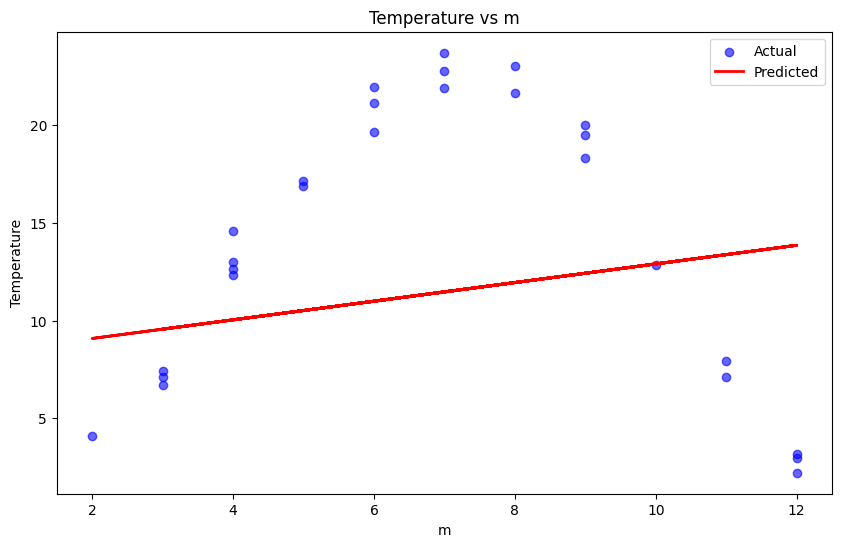

temperature vs ['humidity', 'speed', 'direction', 'month']
MSE: 16.058581011345606, R²: 0.6748328058389778


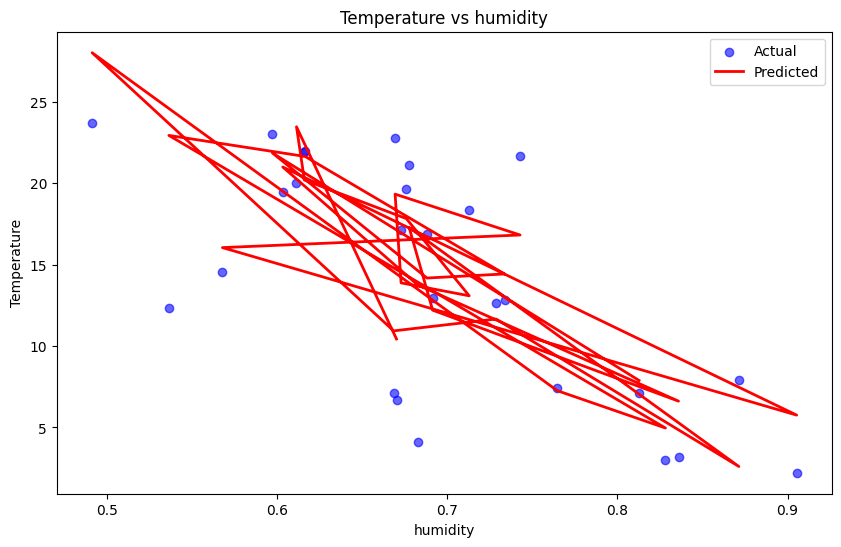

In [51]:
def run_regression(df, target, features):
    X = df[features].values
    y = df[target].values

    if len(X.shape) == 1:
        X = X.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{target} vs {features}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}, R²: {r2_score(y_test, y_pred)}')

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], y_test, alpha=0.6, color='b', label='Actual')
    plt.plot(X_test[:, 0], y_pred, color='r', lw=2, label='Predicted')
    plt.xlabel(f'{features[0]}')
    plt.ylabel(target.capitalize())
    plt.title(f'{target.capitalize()} vs {features[0]}')
    plt.legend()
    plt.show()

    return model

features = ['humidity', 'speed', 'direction', 'month']

for i in features:
    linear_model = run_regression(df_1, target='temperature', features=i)

multilinear_model = run_regression(df_1, target='temperature', features=features)

Features: ['month'], MSE: 5.050434821832288, R²: 0.8977346928008106


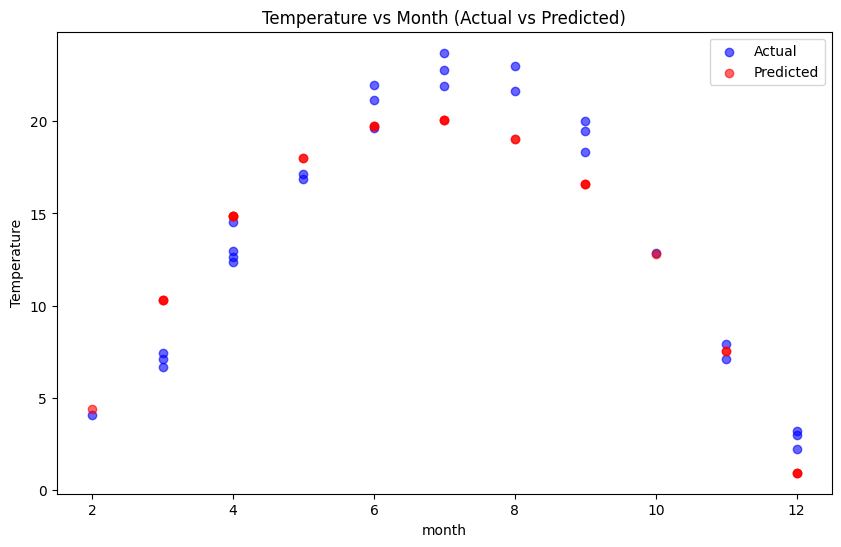

Features: ['month', 'humidity'], MSE: 2.593886461770244, R²: 0.9474768796726071


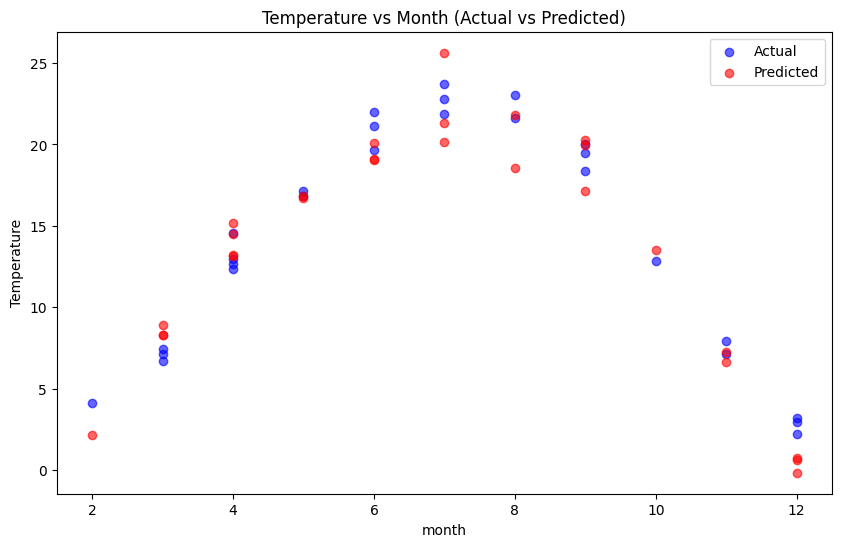

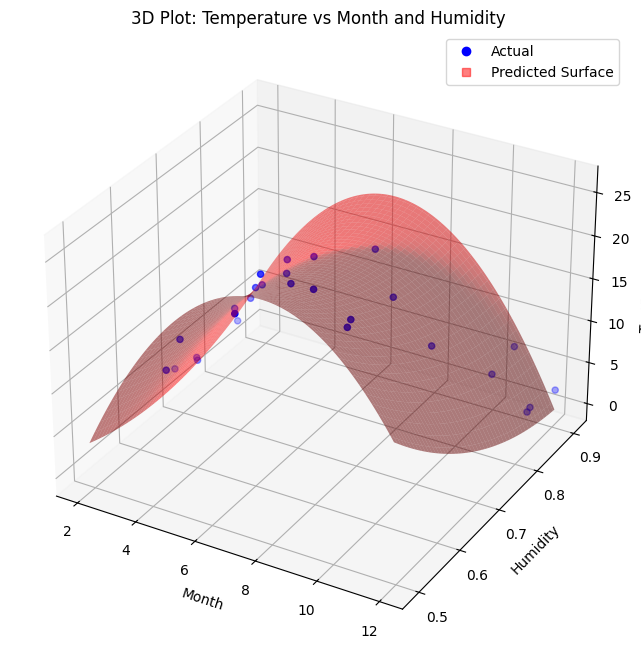

Features: ['month', 'year', 'humidity'], MSE: 3.014393943020504, R²: 0.9389621025758474


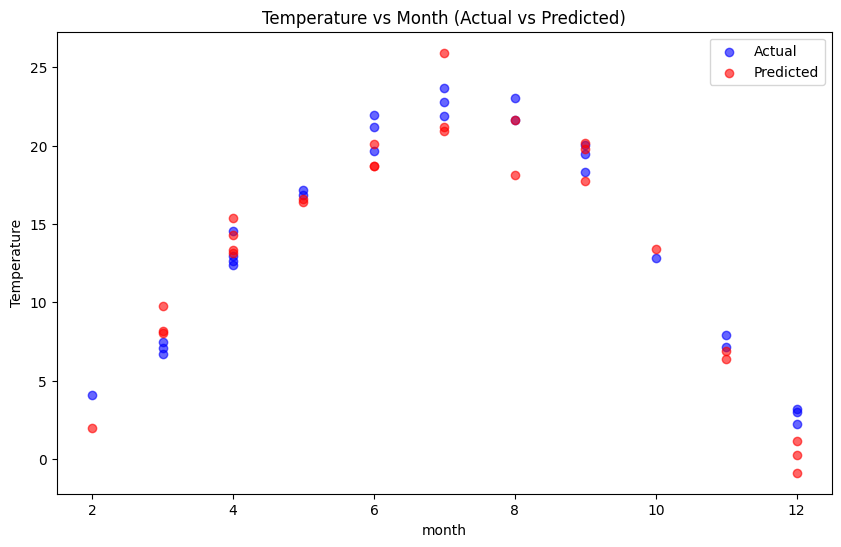

Features: ['month', 'humidity', 'speed', 'direction'], MSE: 3.140983946935996, R²: 0.9363988053360134


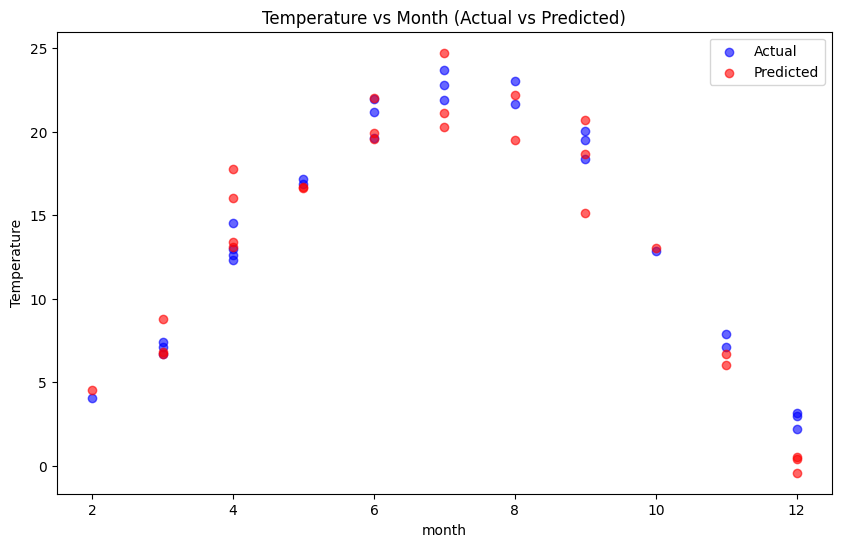

Features: ['year', 'month', 'humidity', 'speed', 'direction'], MSE: 3.353370312487568, R²: 0.9320982336655981


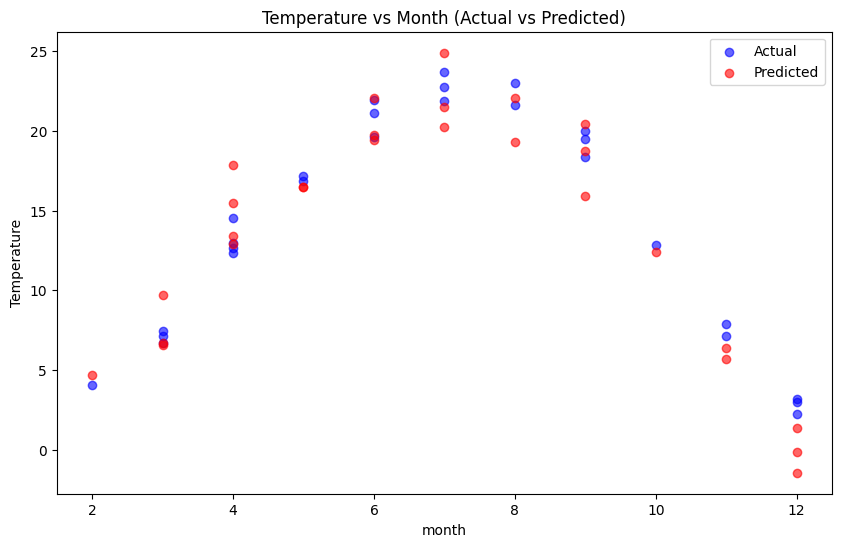

In [45]:
df = df_1
df['month'] = df.index.month

def plot_predictions(X_test, y_test, y_pred, x_feature='month'):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[x_feature], y_test, alpha=0.6, color='b', label='Actual')
    plt.scatter(X_test[x_feature], y_pred, color='r', alpha=0.6, label='Predicted')
    plt.xlabel(x_feature)
    plt.ylabel('Temperature')
    plt.title(f'Temperature vs {x_feature.capitalize()} (Actual vs Predicted)')
    plt.legend()
    plt.show()

def plot_3d_predictions(X_test, y_test, poly, model):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['month'], X_test['humidity'], y_test, color='b', label='Actual')

    month_range, humidity_range = np.linspace(X_test['month'].min(), X_test['month'].max(), 100), np.linspace(X_test['humidity'].min(), X_test['humidity'].max(), 100)
    month_grid, humidity_grid = np.meshgrid(month_range, humidity_range)
    X_grid_poly = poly.transform(pd.DataFrame({'month': month_grid.ravel(), 'humidity': humidity_grid.ravel()}))

    y_grid_pred = model.predict(X_grid_poly).reshape(month_grid.shape)
    ax.plot_surface(month_grid, humidity_grid, y_grid_pred, color='r', alpha=0.5)

    ax.set_xlabel('Month')
    ax.set_ylabel('Humidity')
    ax.set_zlabel('Temperature')
    ax.set_title('3D Plot: Temperature vs Month and Humidity')

    scatter_proxy = plt.Line2D([0], [0], linestyle="none", marker='o', color='b')
    surface_proxy = plt.Line2D([0], [0], linestyle="none", marker='s', color='r', alpha=0.5)
    ax.legend([scatter_proxy, surface_proxy], ['Actual', 'Predicted Surface'])
    plt.show()

def evaluate_model(X_train, X_test, y_train, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    y_pred = model.predict(poly.transform(X_test))
    mse, r2 = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
    return model, poly, y_pred, mse, r2

def regression_pipeline(df, features, degree=2, target='temperature', plot_3d=False):
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    model, poly, y_pred, mse, r2 = evaluate_model(X_train, X_test, y_train, y_test, degree)
    print(f'Features: {features}, MSE: {mse}, R²: {r2}')
    plot_predictions(X_test, y_test, y_pred)
    if plot_3d and 'humidity' in features and 'month' in features:
        plot_3d_predictions(X_test, y_test, poly, model)
    return model

models = [
    regression_pipeline(df, ['month']),
    regression_pipeline(df, ['month', 'humidity'], plot_3d=True),
    regression_pipeline(df, ['month', 'year', 'humidity']),
    regression_pipeline(df, ['month', 'humidity', 'speed', 'direction']),
    regression_pipeline(df, ['year', 'month', 'humidity', 'speed', 'direction'])
]

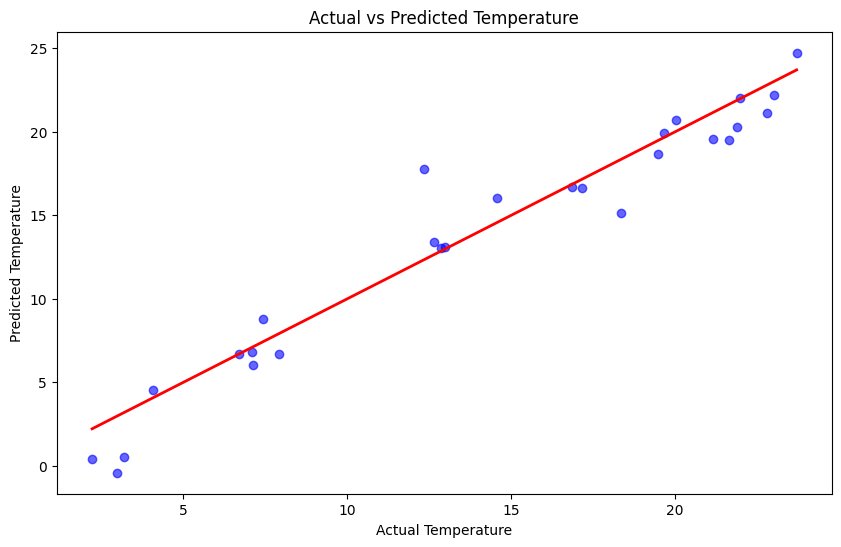

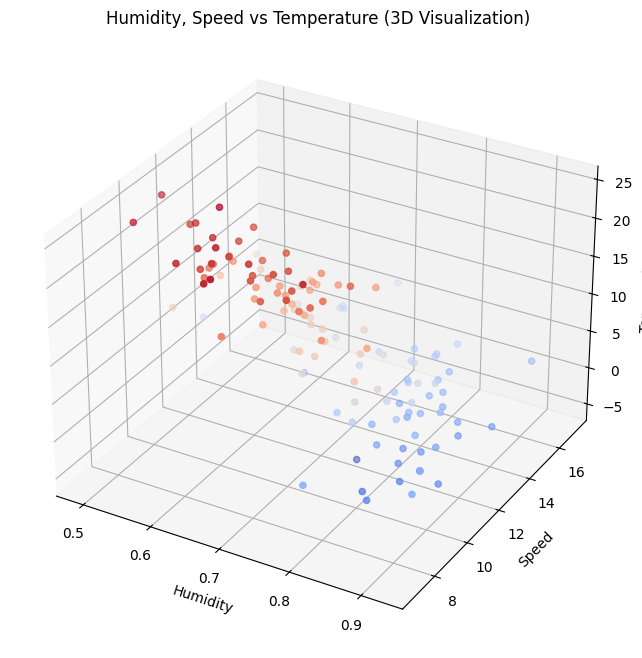

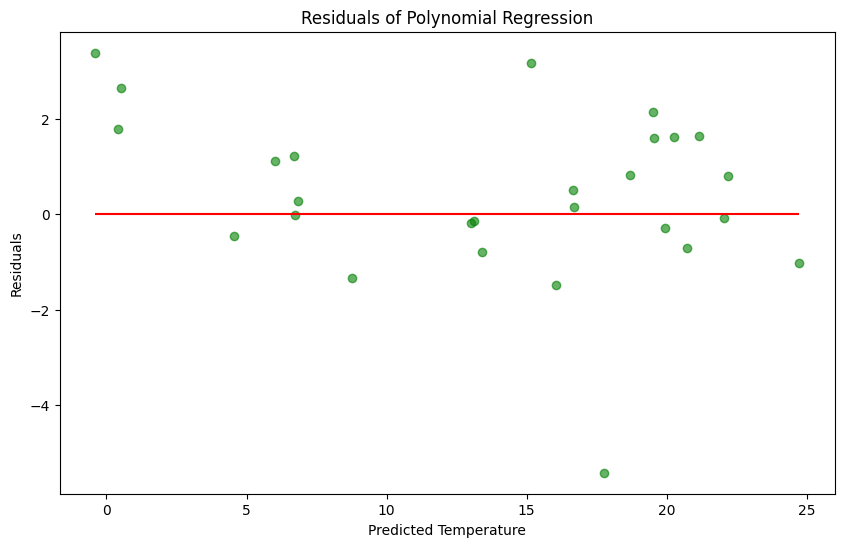

In [46]:
df = df_1

df['month'] = df.index.month
features = ['humidity', 'speed', 'direction', 'month']
X = df[features]
y = df['temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['humidity'], df['speed'], y, c=y, cmap='coolwarm', marker='o')

ax.set_xlabel('Humidity')
ax.set_ylabel('Speed')
ax.set_zlabel('Temperature')

plt.title('Humidity, Speed vs Temperature (3D Visualization)')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='g')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='r')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residuals of Polynomial Regression')
plt.show()